## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [10]:
import keras
print('x_train shape:',x_train.shape[0])
print('x_test shape:',x_test.shape[0])


x_train shape: 60000
x_test shape: 10000


In [11]:
print('y_train shape:',y_train.shape[0])
print('y_test shape:',y_test.shape[0])

y_train shape: 60000
y_test shape: 10000


### Find dimensions of an image in the dataset

In [13]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
#dimension is 28*28

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)  
y_test = keras.utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')      # Change the data type to float from integer (0 - 255)
x_test = x_test.astype('float32')
x_train /= 255                           # Scale the data between 0 and 1
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [30]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

 # Define model
model2 = Sequential()

     # 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28,28,1)))
model2.add(Activation('relu'))

    # 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

    # Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

    # Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

    # Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

    # Train the model2
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(x_test, y_test), callbacks=callback_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 28s 466us/step - loss: 0.3746 - acc: 0.8651 - val_loss: 0.2895 - val_acc: 0.8927
Epoch 2/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.2286 - acc: 0.9152 - val_loss: 0.2703 - val_acc: 0.8999
Epoch 3/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.1670 - acc: 0.9375 - val_loss: 0.2594 - val_acc: 0.9104
Epoch 4/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.1173 - acc: 0.9567 - val_loss: 0.2791 - val_acc: 0.9140
Epoch 5/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0773 - acc: 0.9720 - val_loss: 0.2881 - val_acc: 0.9143
Epoch 6/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.0512 - acc: 0.9813 - val_loss: 0.3451 - val_acc: 0.9118
Epoch 7/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.0344 - acc: 0.9878 - val_

In [31]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 56us/step
[0.5241140804016031, 0.9124]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [32]:
 # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.5))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.4954 - acc: 0.8258 - val_loss: 0.3267 - val_acc: 0.8813
Epoch 2/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.3382 - acc: 0.8777 - val_loss: 0.2798 - val_acc: 0.8949
Epoch 3/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.2953 - acc: 0.8934 - val_loss: 0.2712 - val_acc: 0.8989
Epoch 4/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.2648 - acc: 0.9033 - val_loss: 0.2410 - val_acc: 0.9150
Epoch 5/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.2490 - acc: 0.9089 - val_loss: 0.2397 - val_acc: 0.9151
Epoch 6/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.2295 - acc: 0.9149 - val_loss: 0.2488 - val_acc: 0.9092
Epoch 7/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.2149 - acc: 0.9201 - val_loss: 0.

In [33]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 55us/step
[0.22354734820127486, 0.9209]


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

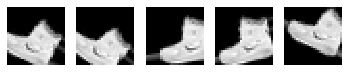

In [35]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [36]:
model3.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
  11/1875 [..............................] - ETA: 24s - loss: 3.1704 - acc: 0.2386

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 20s 11ms/step - loss: 1.1905 - acc: 0.5595 - val_loss: 0.5293 - val_acc: 0.8055
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.9087 - acc: 0.6588 - val_loss: 0.5118 - val_acc: 0.8074
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.8307 - acc: 0.6893 - val_loss: 0.5064 - val_acc: 0.8231
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7850 - acc: 0.7076 - val_loss: 0.4976 - val_acc: 0.8301
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7624 - acc: 0.7185 - val_loss: 0.4720 - val_acc: 0.8349
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7367 - acc: 0.7275 - val_loss: 0.4803 - val_acc: 0.8328
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7088 - acc: 0.7383 - val_loss: 0.5157 - val_acc: 0.8137
Epoch 8/10
1875/1875 [==============================] - 20s

###  Report the final train and validation accuracy

In [42]:
loss_and_metrics  = model3.evaluate(x_test, y_test,)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 53us/step
[0.46969321594238284, 0.8408]


In [43]:
loss_and_metrics = model3.evaluate(x_train, y_train)

print(loss_and_metrics)

60000/60000 [==============================] - 3s 53us/step
[0.43999213462670644, 0.84345]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [49]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [50]:
print('x_train shape:',x_train.shape[0])
print('x_test shape:',x_test.shape[0])
print('y_train shape:',y_train.shape[0])
print('y_test shape:',y_test.shape[0])

x_train shape: 50000
x_test shape: 10000
y_train shape: 50000
y_test shape: 10000


In [51]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
data_gen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

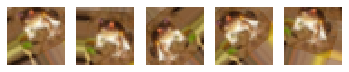

In [59]:
from matplotlib import pyplot as plt
gen = data_gen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'), cmap='gray')
    plt.plot()
plt.show()